t-distributed stochastic neighbour embedding (tSNE) is a Machine Learning non-linear dimensionality reduction technique.
 
Perplexity- Defines balance between local and global aspects of your data. No. of points we want to preserve in local neighbourhood.
 
Biggest mistake people make with t-SNE is only using one value for perplexity and not testing how the results change with other values.
 
Sensitivity of tSNE to perplexity-
We should always run the algo for various value’s of perplexity.
If perplexity is large, clusters will tend to shrink into denser structures
 
Found this article for deep dive-https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dr = pd.read_csv('/Users/Documents/Python/Appl DS/DR_train.csv')


In [20]:
dr.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dr.shape

(42000, 785)

In [22]:
l = dr['label']

In [23]:
d = dr.drop('label',axis = 1)

In [24]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
d.shape

(42000, 784)

/Users/akhilesh.karki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


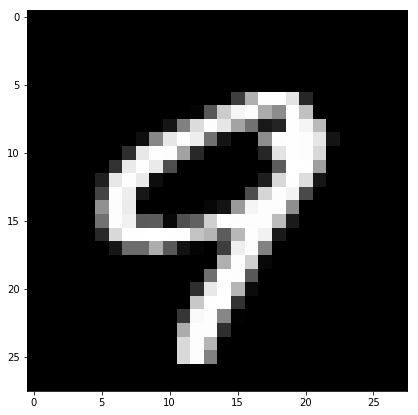

9


In [26]:
plt.figure(figsize = (7,7))
indx = 100

gr_d = d.iloc[indx].as_matrix().reshape(28,28)
plt.imshow(gr_d,interpolation = "none", cmap = "gray")
plt.show()         
    
print(l[indx])    

In [39]:
l.shape

(42000,)

In [27]:
#t- SNE

In [28]:
#Data preprocseeing

In [42]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(d)
print(std_data.shape)

(42000, 784)


In [73]:
d_40000 = std_data[0:40000,:]
l_40000 = l[0:40000]

l_40000.shape

(40000,)

Text(0.5,0.98,'Digit  Recognizer with perplexity =2')

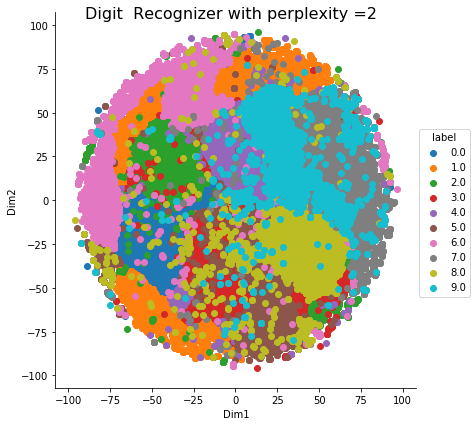

In [74]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 2)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
a= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
a.fig.suptitle('Digit  Recognizer with perplexity =2', fontsize=16)

Text(0.5,0.98,'Digit  Recognizer with perplexity =15')

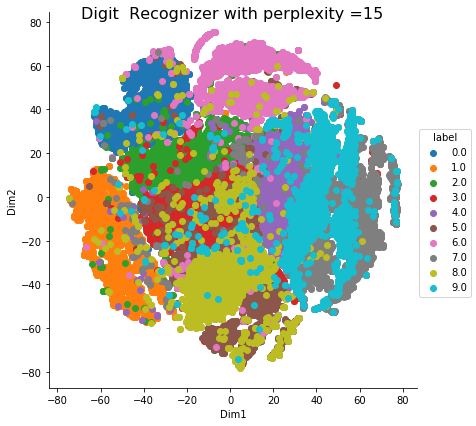

In [83]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 15)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
b= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
b.fig.suptitle('Digit  Recognizer with perplexity =15', fontsize=16)

Text(0.5,0.98,'Digit  Recognizer with perplexity =20')

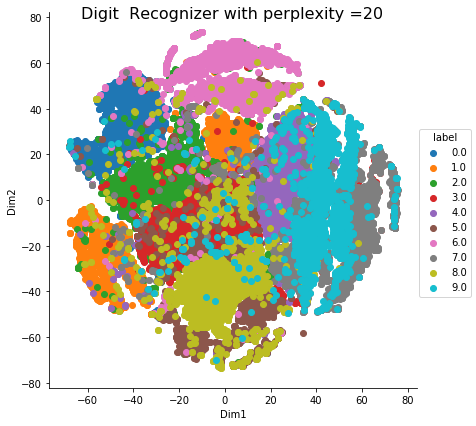

In [75]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 20)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
b= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
b.fig.suptitle('Digit  Recognizer with perplexity =20', fontsize=16)

Text(0.5,0.98,'Digit  Recognizer with perplexity =30')

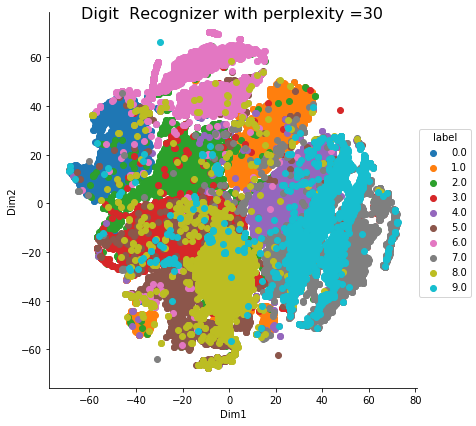

In [80]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 30)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
c= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
c.fig.suptitle('Digit  Recognizer with perplexity =30', fontsize=16)

Text(0.5,0.98,'Digit  Recognizer with perplexity =50')

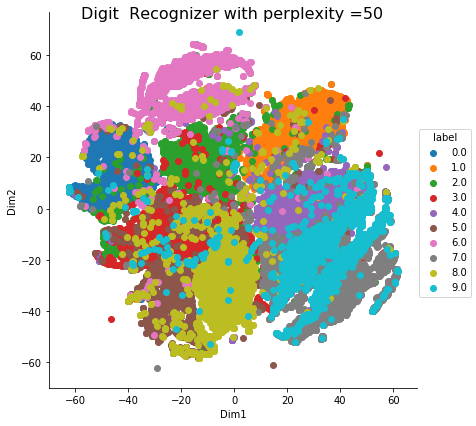

In [76]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 50)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
c= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
c.fig.suptitle('Digit  Recognizer with perplexity =50', fontsize=16)

Text(0.5,0.98,'Digit  Recognizer with perplexity =100')

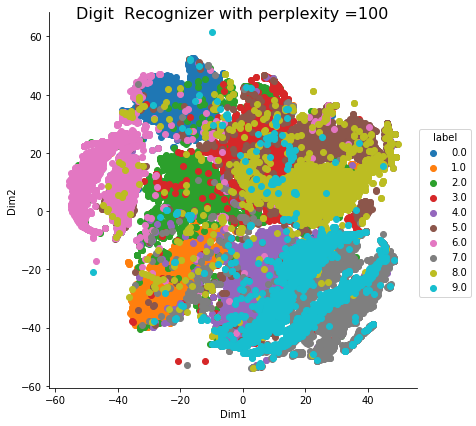

In [77]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 100)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
d= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
d.fig.suptitle('Digit  Recognizer with perplexity =100', fontsize=16)

Text(0.5,0.98,'Digit  Recognizer with perplexity =150')

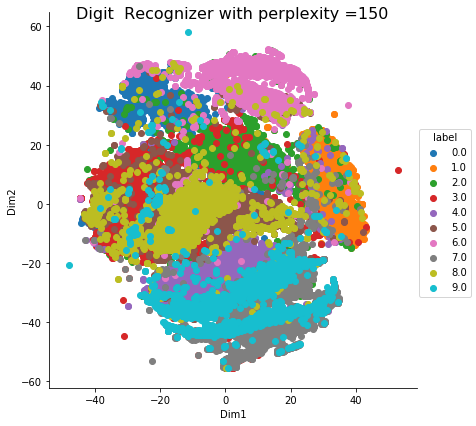

In [78]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 150)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
e= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
e.fig.suptitle('Digit  Recognizer with perplexity =150', fontsize=16)

Text(0.5,0.98,'Digit  Recognizer with perplexity =200')

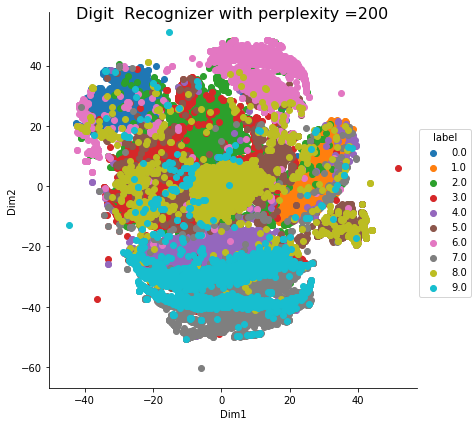

In [79]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components =2,random_state = 0,perplexity = 200)
tsne_data = model.fit_transform(d_40000)
# data frame creation
tsne_data = np.vstack((tsne_data.T,l_40000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns = ("Dim1","Dim2","label"))

#plot
e= sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
e.fig.suptitle('Digit  Recognizer with perplexity =200', fontsize=16)